In [1]:
import pandas as pd
import numpy as np

In [2]:
sales = pd.read_csv('data/sales.csv', parse_dates=["date"])

/home/user/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
ph = pd.read_csv('data/product_hierarchy.csv')

In [4]:
sales.drop('promo_bin_1', axis=1, inplace=True)

In [5]:
sales.drop('promo_type_1', axis=1, inplace=True)

In [6]:
sales.drop('promo_type_2', axis=1, inplace=True)
sales.drop('promo_bin_2', axis=1, inplace=True)
sales.drop('promo_discount_2', axis=1, inplace=True)
sales.drop('promo_discount_type_2', axis=1, inplace=True)

In [7]:
sales = sales.dropna()

In [8]:
sales

,product_id,store_id,date,sales,revenue,stock,price
0,P0001,S0002,2017-01-02,0.0,0.00,8.0,6.25
1,P0001,S0012,2017-01-02,1.0,5.30,0.0,6.25
2,P0001,S0013,2017-01-02,2.0,10.59,0.0,6.25
3,P0001,S0023,2017-01-02,0.0,0.00,6.0,6.25
4,P0001,S0025,2017-01-02,0.0,0.00,1.0,6.25
...,...,...,...,...,...,...,...
18264071,P0748,S0125,2019-10-31,0.0,0.00,11.0,18.90
18264072,P0748,S0126,2019-10-31,0.0,0.00,4.0,18.90
18264073,P0748,S0131,2019-10-31,0.0,0.00,6.0,18.90
18264074,P0748,S0132,2019-10-31,0.0,0.00,2.0,18.90


In [14]:
sales['product_id'][0]

'P0001'

In [15]:
store = sales.loc[(sales['product_id'] == 'P0001') & (sales['store_id'] == 'S0002')]

In [16]:
store

,product_id,store_id,date,sales,revenue,stock,price
0,P0001,S0002,2017-01-02,0.0,0.0,8.0,6.25
13139,P0001,S0002,2017-01-03,0.0,0.0,8.0,6.25
26247,P0001,S0002,2017-01-04,0.0,0.0,8.0,6.25
39334,P0001,S0002,2017-01-05,0.0,0.0,8.0,6.25
52427,P0001,S0002,2017-01-06,0.0,0.0,8.0,6.25
...,...,...,...,...,...,...,...
18164497,P0001,S0002,2019-10-27,0.0,0.0,10.0,10.95
18184435,P0001,S0002,2019-10-28,0.0,0.0,10.0,10.95
18204379,P0001,S0002,2019-10-29,0.0,0.0,10.0,10.95
18224310,P0001,S0002,2019-10-30,0.0,0.0,10.0,10.95


In [17]:
filtered_df = store.loc[(store['date'] >= '2017-01-01') & (store['date'] < '2018-01-1')]['stock']
# Display
filtered_df

0          8.0
13139      8.0
26247      8.0
39334      8.0
52427      8.0
          ... 
5294842    3.0
5311070    2.0
5327265    2.0
5343541    2.0
5359765    2.0
Name: stock, Length: 262, dtype: float64

In [18]:
store['dayofyear'] = store['date'].dt.dayofyear
store['stock_2017'] = store.loc[(store['date'] >= '2017-01-01') & (store['date'] < '2018-01-1')]['stock']
store['stock_2018'] = store.loc[(store['date'] >= '2018-01-01') & (store['date'] < '2019-01-1')]['stock']
store['stock_2019'] = store.loc[(store['date'] >= '2019-01-01') & (store['date'] < '2020-01-1')]['stock']

<ipython-input-18-c5194fc961d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['dayofyear'] = store['date'].dt.dayofyear
<ipython-input-18-c5194fc961d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store['stock_2017'] = store.loc[(store['date'] >= '2017-01-01') & (store['date'] < '2018-01-1')]['stock']
<ipython-input-18-c5194fc961d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

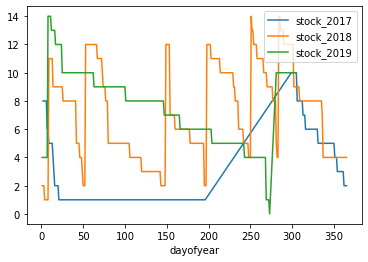

In [19]:
store.plot(x='dayofyear', y=['stock_2017','stock_2018','stock_2019'])

In [ ]:
Total revenue
price vs. sales

In [20]:
gg = sales.groupby(sales['date'].dt.date)

In [27]:
summy = gg.sum()

pd.set_option('display.max_rows', None)

In [28]:
summy.loc[(summy['revenue']> 500000)]

,sales,revenue,stock,price
date,,,,
2019-08-20,24071.777,551133.779,295627.998,419572.15


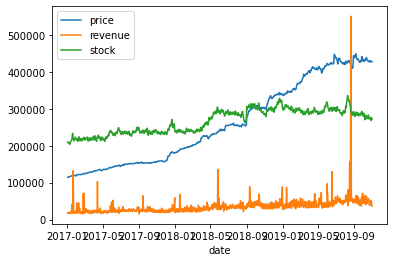

In [29]:
summy.plot(y=['price','revenue','stock'])

In [13]:
sales.loc[(sales['date'] == '2019-08-20')].describe()

,sales,revenue,stock,price
count,20618.000000,20618.000000,20618.000000,20618.000000
mean,1.167513,26.730710,14.338345,20.349799
std,14.432076,437.788702,31.558169,40.303658
min,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,4.000000,4.400000
50%,0.000000,0.000000,8.000000,10.950000
75%,0.000000,0.000000,15.000000,21.950000
max,587.000000,17881.760000,1613.000000,1499.000000
